In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
zoo = pd.read_csv("./zoo/zoo.data", header=None)
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type",
]
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [20]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [21]:
#To find the number of values in each feature
for col in zoo.columns:
    print(zoo[col].value_counts())

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: i

In [22]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [23]:
#Checking if the data contains null or na values
print(zoo.isna().values.any())
print(zoo.isnull().values.any())

False
False


In [24]:
#Feature Selection
X = zoo.drop(['animal name', 'type'], axis=1)
y = zoo['type']

In [25]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((70, 16), (31, 16))

In [26]:
y_train.shape, y_test.shape

((70,), (31,))

Random Forest Classifier

In [27]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#instantiating the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

#fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [28]:
#Predicting the Test Set results
y_pred = rfc.predict(X_test)
#Checking the Accuracy Score
from sklearn.metrics import accuracy_score
print("Model Accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy score: 0.9355


Random Forest Classifier Model with parameter n_estimators=100

In [29]:
#Instantiating the Classifier with n_estimators (100)
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

#Fitting the Model
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
#Predicting on the test results
y_pred_100 = rfc_100.predict(X_test)
#Checking the Accuracy Score
print("Model Accuracy score with 100 decision trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

Model Accuracy score with 100 decision trees: 0.9355


In [31]:
#Viewing the Feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

milk        0.166889
feathers    0.164027
fins        0.097991
hair        0.084737
legs        0.081204
aquatic     0.066432
backbone    0.062818
toothed     0.060591
eggs        0.057478
breathes    0.049839
airborne    0.049776
tail        0.026498
predator    0.018181
catsize     0.013248
domestic    0.000292
venomous    0.000000
dtype: float64

In [32]:
#Classification report
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



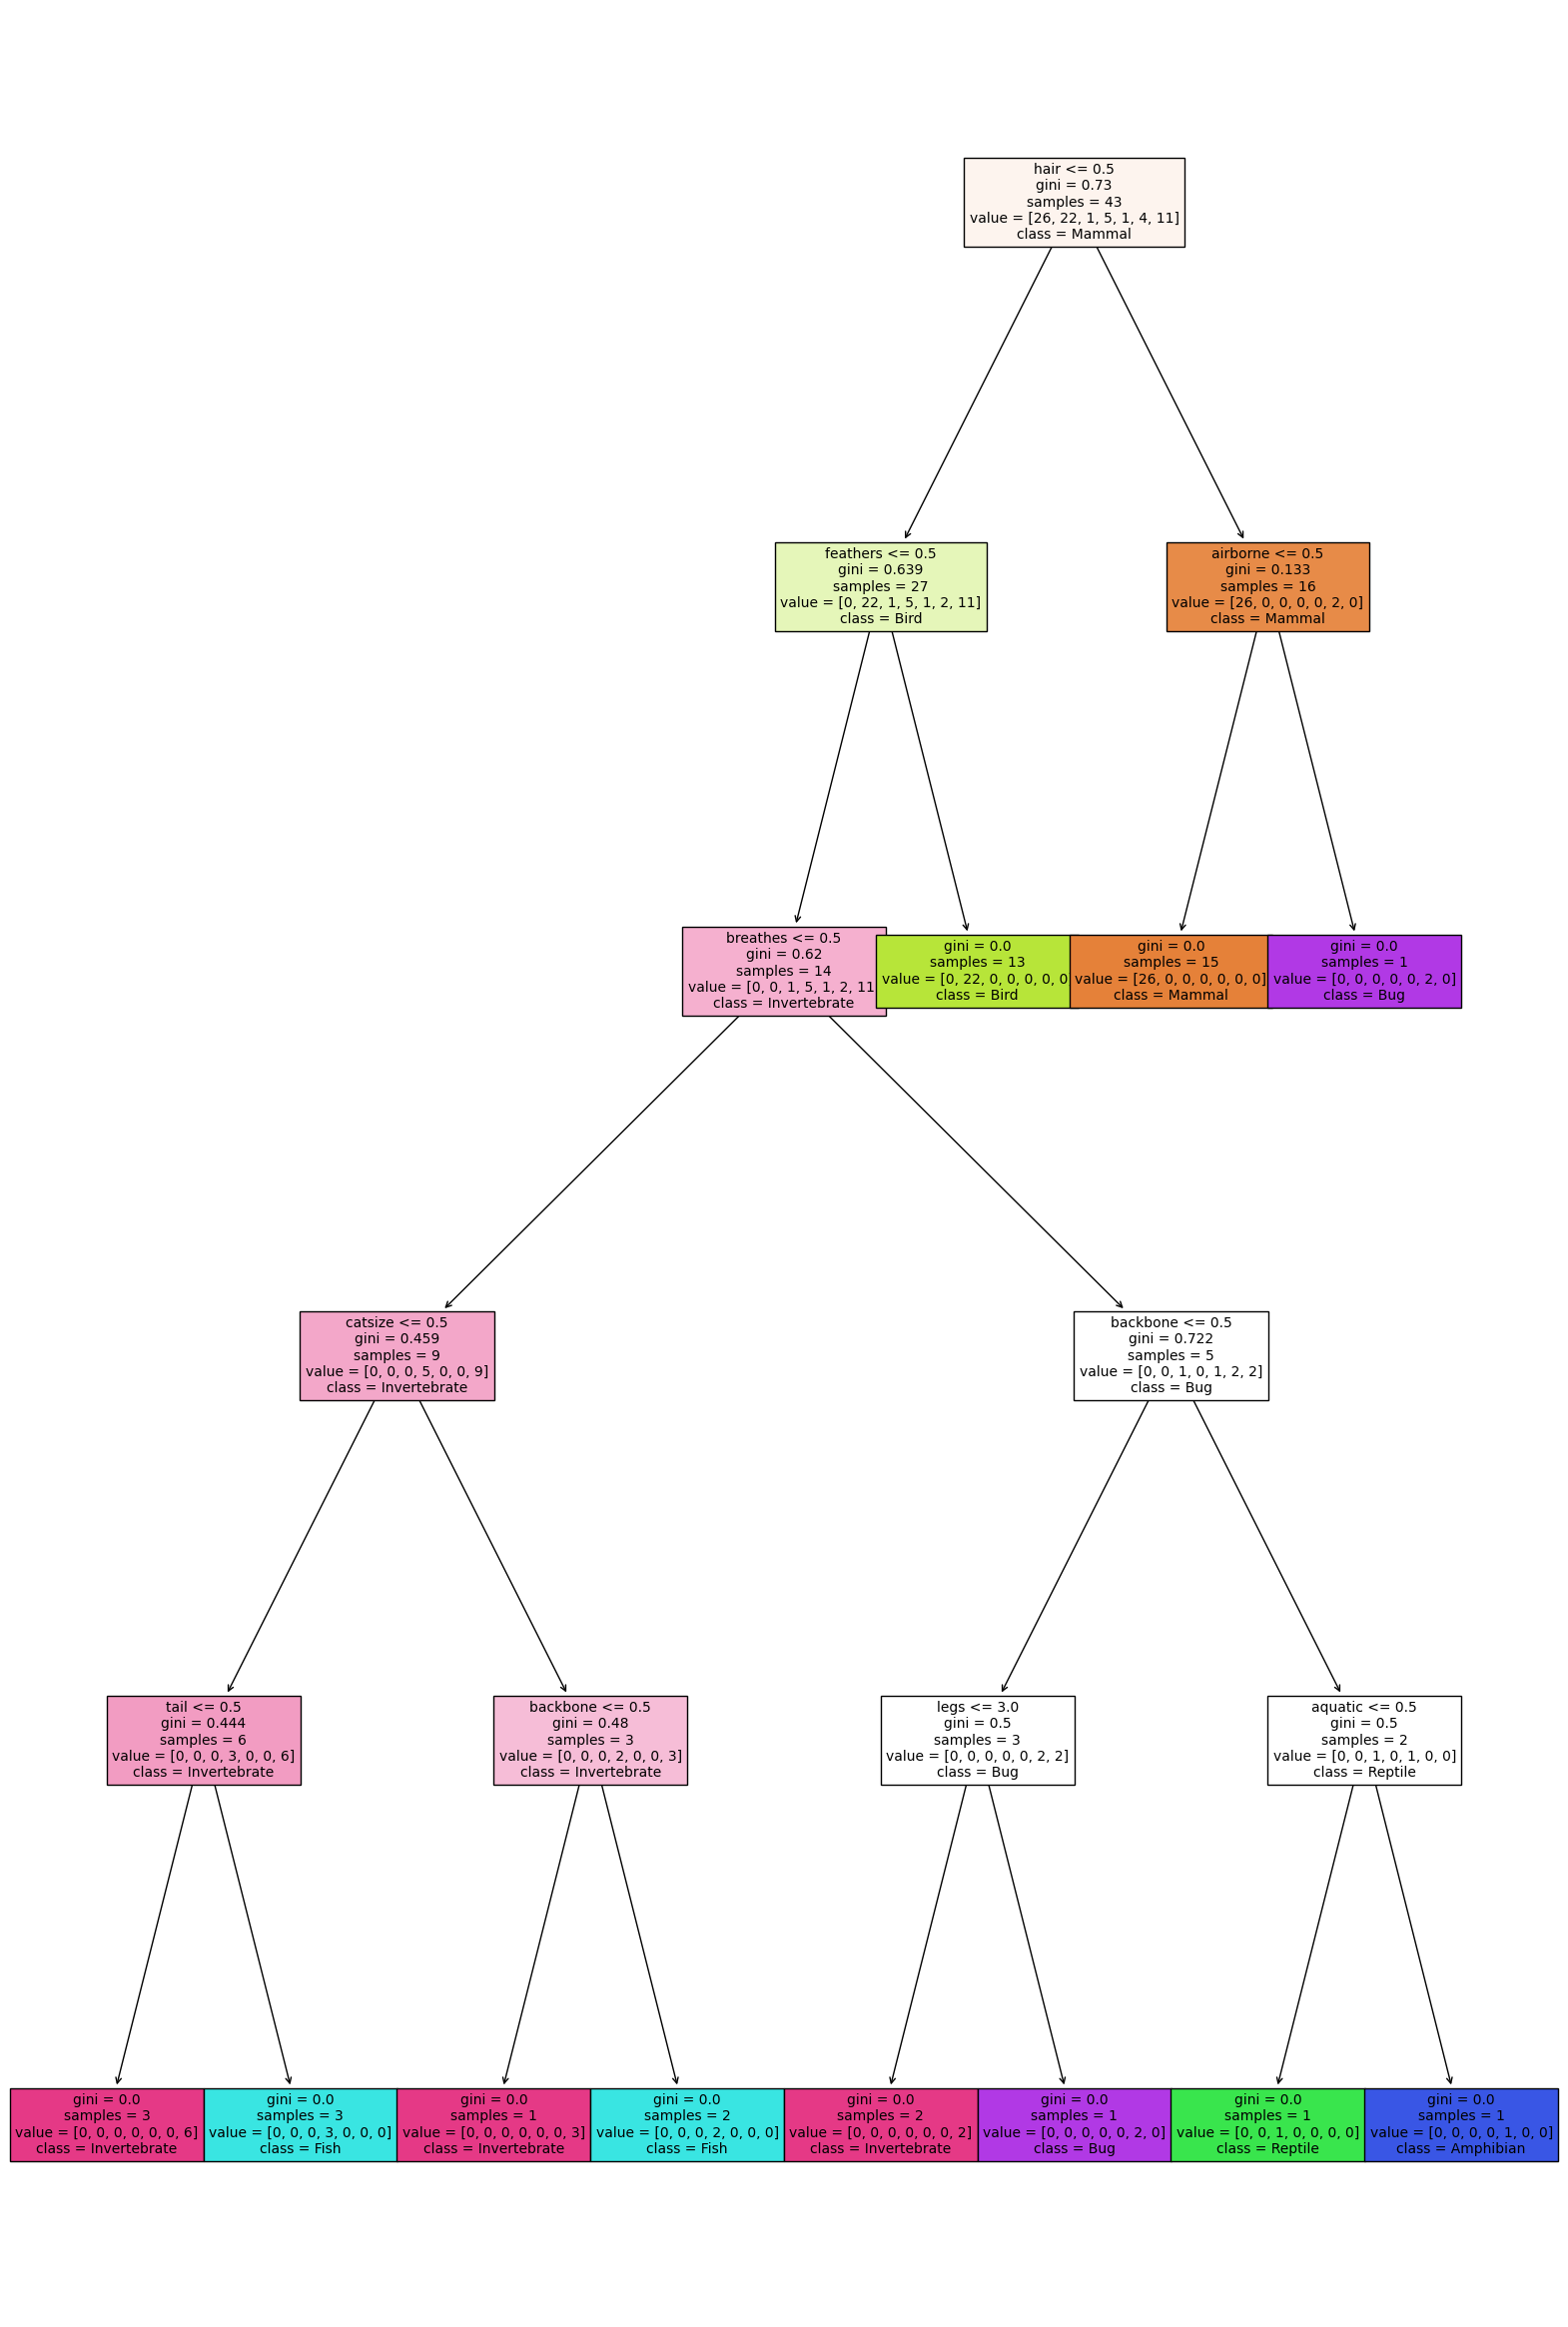

In [36]:
from sklearn import tree
def plot_DT(model):
    #Plotting the Random Forest Tree
    plt.figure("Random Forest Tree", figsize=(20, 30))
    tree.plot_tree(model, fontsize=10, filled=True, feature_names=list(X.columns), class_names=["Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate"])
#plt.tight_layout()
#plt.show()

plot_DT(rfc.estimators_[0])

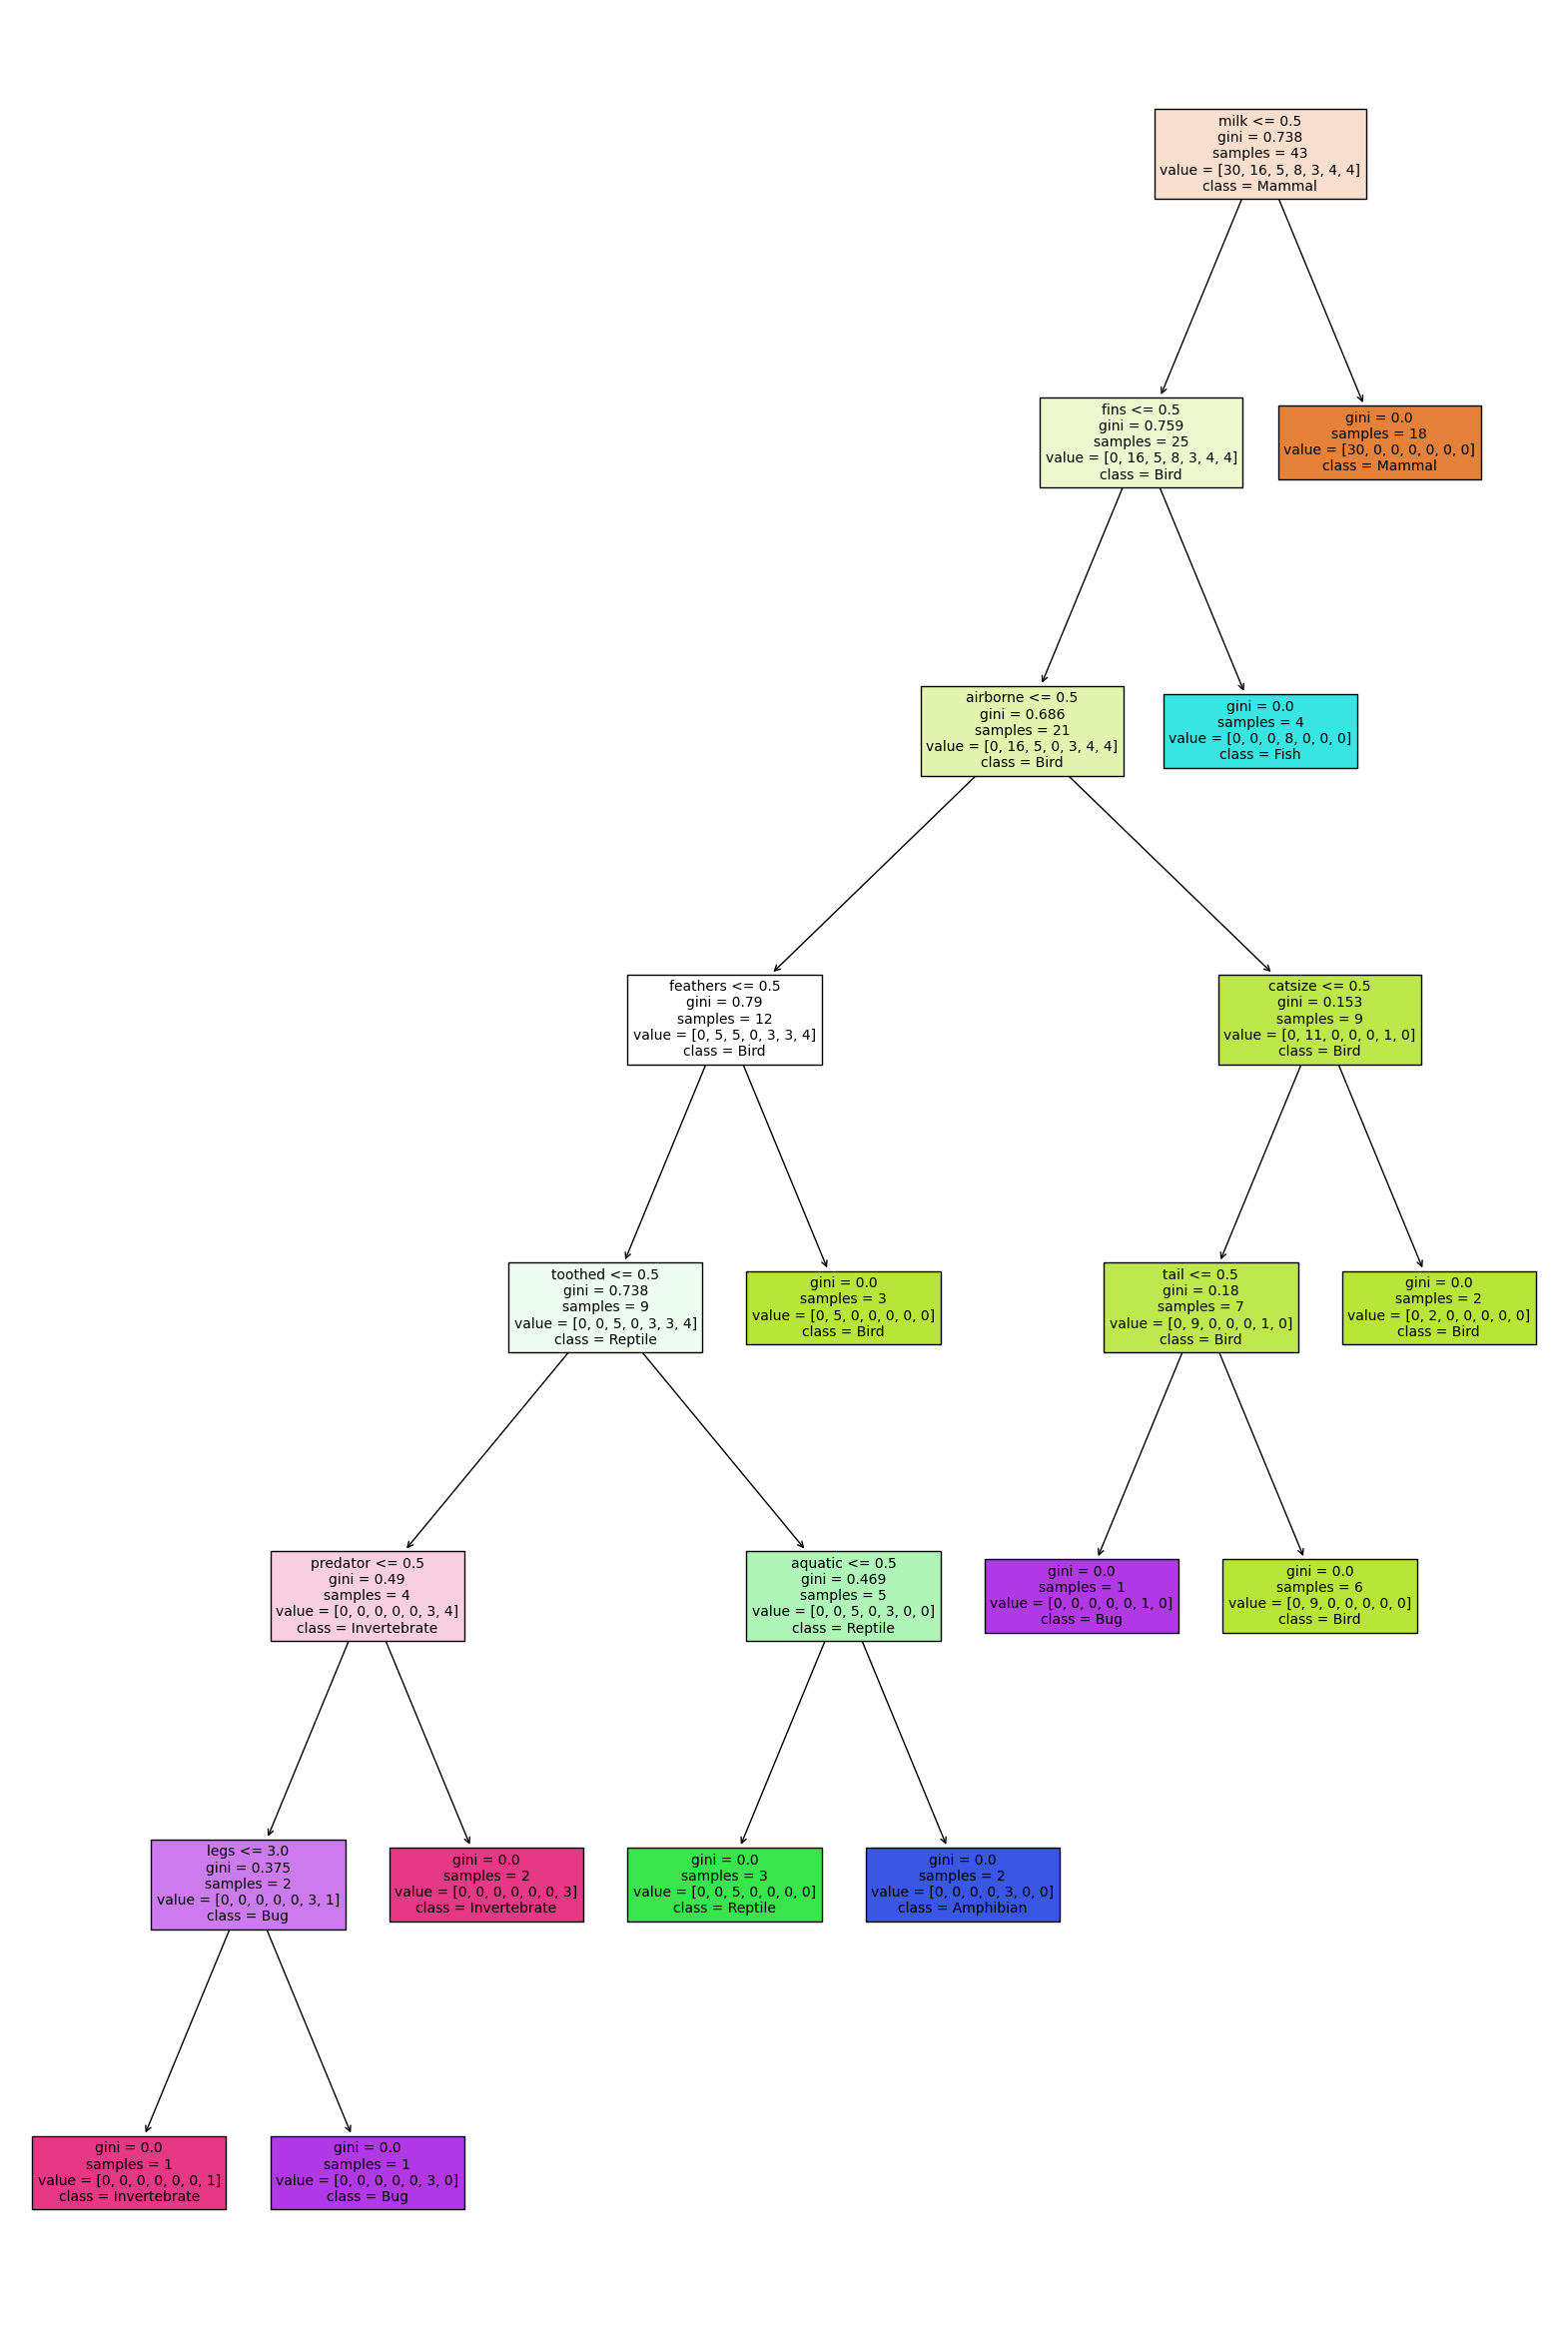

In [37]:
plot_DT(rfc.estimators_[1])